In [37]:
import pandas as pd
df = pd.read_csv('spam.csv', encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [38]:
df['text'] = df.iloc[:, 1:].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)
df = df.drop(['v2','Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df.head(5)

,v1,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [43]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')
ham = cv.fit_transform(df[df['v1']=='ham']['text'])
ham_bow = pd.DataFrame(ham.toarray(), columns=cv.get_feature_names_out())

In [44]:
cv = CountVectorizer(stop_words='english')
spam = cv.fit_transform(df[df['v1']=='spam']['text'])
spam_bow = pd.DataFrame(spam.toarray(), columns=cv.get_feature_names_out())

In [50]:
# top 10 most frequent words
print("Ham: \n", ham_bow.sum().sort_values(ascending=False).head(10))

print("\n\nSpam: \n", spam_bow.sum().sort_values(ascending=False).head(10))

Ham: 
 gt      318
lt      316
just    297
ok      288
ll      266
ur      247
know    237
good    235
like    234
got     233
dtype: int64


Spam: 
 free      224
txt       163
ur        144
mobile    127
text      125
stop      123
claim     113
reply     104
www        98
prize      93
dtype: int64


In [51]:
cv = CountVectorizer(stop_words='english', ngram_range=(2,2))
ham = cv.fit_transform(df[df['v1']=='ham']['text'])
ham_bow = pd.DataFrame(ham.toarray(), columns=cv.get_feature_names_out())

In [52]:
cv = CountVectorizer(stop_words='english', ngram_range=(2,2))
spam = cv.fit_transform(df[df['v1']=='spam']['text'])
spam_bow = pd.DataFrame(spam.toarray(), columns=cv.get_feature_names_out())

In [53]:
# top 10 most frequent words bi-grams
print("Ham: \n", ham_bow.sum().sort_values(ascending=False).head(10))

print("\n\nSpam: \n", spam_bow.sum().sort_values(ascending=False).head(10))

Ham: 
 lt gt           276
ll later         42
let know         40
sorry ll         39
good morning     32
don know         24
decimal gt       23
lt decimal       23
new year         23
pls send         22
dtype: int64


Spam: 
 po box              27
1000 cash           23
prize guaranteed    22
send stop           21
national rate       20
selected receive    19
await collection    19
land line           18
urgent mobile       18
chance win          17
dtype: int64


In [54]:
cv = CountVectorizer(stop_words='english', ngram_range=(3,3))
ham = cv.fit_transform(df[df['v1']=='ham']['text'])
ham_bow = pd.DataFrame(ham.toarray(), columns=cv.get_feature_names_out())

In [55]:
cv = CountVectorizer(stop_words='english', ngram_range=(3,3))
spam = cv.fit_transform(df[df['v1']=='spam']['text'])
spam_bow = pd.DataFrame(spam.toarray(), columns=cv.get_feature_names_out())

In [56]:
# top 10 most frequent words tri-grams
print("Ham: \n", ham_bow.sum().sort_values(ascending=False).head(10))

print("\n\nSpam: \n", spam_bow.sum().sort_values(ascending=False).head(10))

Ham: 
 sorry ll later      38
lt decimal gt       23
happy new year      18
gt lt gt            15
like lt gt          14
lt gt lt            13
pls send message    13
phone right pls     12
right pls send      12
pick phone right    12
dtype: int64


Spam: 
 suite342 2lands row       15
draw shows won            15
land line claim           14
private 2003 account      13
2003 account statement    13
shows 800 redeemed        12
guaranteed 1000 cash      12
800 redeemed points       12
week just txt             11
bonus caller prize        11
dtype: int64


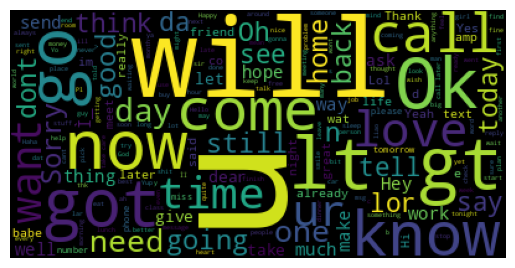

In [69]:
# wordcloud ham
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc = WordCloud()
wc.generate(' '.join(df[df['v1']=='ham']['text']))
plt.imshow(wc)
plt.axis('off')
plt.show()

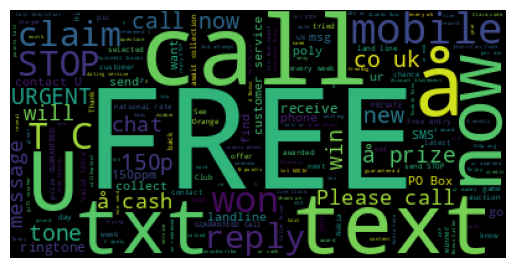

In [70]:
wc = WordCloud()
wc.generate(' '.join(df[df['v1']=='spam']['text']))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [67]:
cv = CountVectorizer(stop_words='english')
X = cv.fit_transform(df['text'])
bow = pd.DataFrame(X.toarray(), columns=cv.get_feature_names_out())

In [71]:
y = df['v1'].map({'ham':0, 'spam':1})

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bow, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.97847533632287

In [72]:
# f1 score
from sklearn.metrics import f1_score
f1_score(y_test, lr.predict(X_test))

0.9130434782608696

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(df['text'])
tfidf_df = pd.DataFrame(X.toarray(), columns=tfidf.get_feature_names_out())
tfidf_df

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,ó_,û_,û_thanks,ûªm,ûªt,ûªve,ûï,ûïharry,ûò,ûówell
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_df, y, test_size=0.2, random_state=42)
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9452914798206278

In [77]:
f1_score(y_test, lr.predict(X_test))

0.7510204081632653

In [84]:
# preprocessing
import string
import re
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

df['text'] = df['text'].str.lower()
df['text'] = df['text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
df['text'] = df['text'].apply(lambda x: re.compile(r'https?://\S+|www\.\S+').sub('', x))
df['text'] = df['text'].apply(lambda x: re.compile(r'<.*?>').sub('', x))
df['tokens'] = df['text'].str.split()
df['tokens'] = df['tokens'].apply(lambda x: [token for token in x if not token.isnumeric()])
df['tokens'] = df['tokens'].apply(lambda x: [lemmatizer.lemmatize(token) for token in x])
df['text'] = df['tokens'].apply(lambda x: ' '.join(x))
df

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,v1,text,tokens
0,ham,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,ham,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,free entry in a wkly comp to win fa cup final ...,"[free, entry, in, a, wkly, comp, to, win, fa, ..."
3,ham,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,nah i dont think he go to usf he life around h...,"[nah, i, dont, think, he, go, to, usf, he, lif..."
...,...,...,...
5567,spam,this is the 2nd time we have tried contact u u...,"[this, is, the, 2nd, time, we, have, tried, co..."
5568,ham,will ì b going to esplanade fr home,"[will, ì, b, going, to, esplanade, fr, home]"
5569,ham,pity wa in mood for that soany other suggestion,"[pity, wa, in, mood, for, that, soany, other, ..."
5570,ham,the guy did some bitching but i acted like id ...,"[the, guy, did, some, bitching, but, i, acted,..."


In [85]:
tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(df['text'])
tfidf_df = pd.DataFrame(X.toarray(), columns=tfidf.get_feature_names_out())

X_train, X_test, y_train, y_test = train_test_split(tfidf_df, y, test_size=0.2, random_state=42)
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9417040358744395

In [86]:
f1_score(y_test, lr.predict(X_test))

0.7302904564315353

# **F1 Scores**
BOW - 0.913

Tfidf - 0.751

After preprocessing - 0.73